In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.patches as patches
from PIL import Image

Upload the retinal scan to be analised

In [2]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

original_img = image.load_img(image_path)

Saving DME-1102486-1.jpeg to DME-1102486-1.jpeg


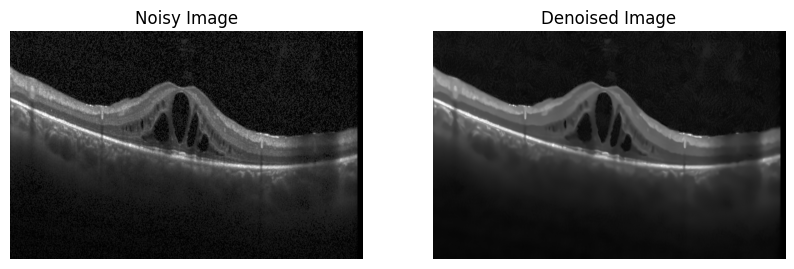

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a noisy grayscale image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Non-Local Means Denoising
denoised = cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=7, searchWindowSize=21)

# Display images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised Image")
plt.axis("off")

plt.show()


In [6]:
#Resize and preprocess the image
target_size = (224, 224)  # Adjust to match training size
resized_img = cv2.resize(denoised, target_size)

img_array = tf.keras.preprocessing.image.img_to_array(resized_img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
all_lables = ['normal', 'drusen', 'diabetic macular edema', 'choroidal neovascularization']

Upload trained model and paste path before running the codeblock below

In [8]:
model_path = "/content/OCT_model.keras"
model = tf.keras.models.load_model(model_path)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
img_array = tf.keras.preprocessing.image.img_to_array(resized_img)
img_array = img_array / 255.0
img_array = tf.image.resize(img_array, [50, 50])
img_array = np.expand_dims(img_array, axis=0)
y_pred = model.predict(img_array)
predicted_index = np.argmax(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [11]:
print("Predicted label : ",all_lables[predicted_index])

Predicted label :  diabetic macular edema


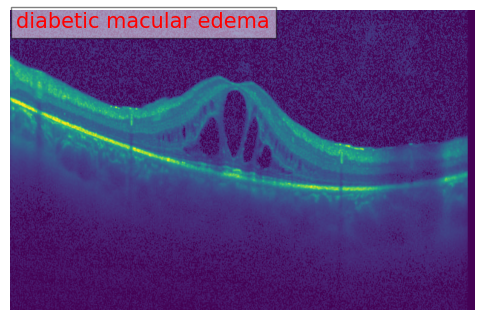

In [12]:
img = Image.open(image_path)

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")

text = all_lables[predicted_index]
plt.text(10, 30, text, fontsize=15, color="red", bbox=dict(facecolor="white", alpha=0.5))

plt.show()